In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
insurance_dataset = pd.read_csv('downloads\insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

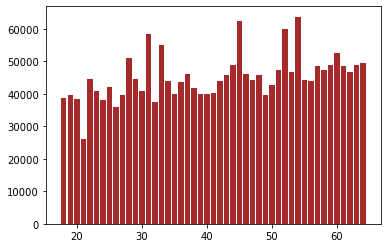

In [8]:
plt.bar(insurance_dataset["age"],insurance_dataset["charges"],color='brown')
plt.show()

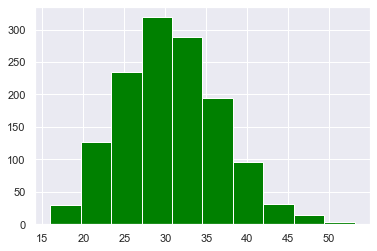

In [53]:
plt.hist(insurance_dataset["bmi"],color='green')
plt.show()

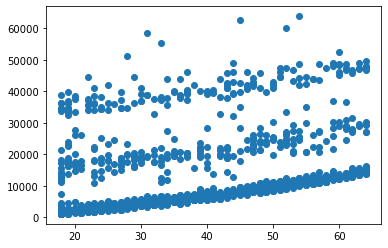

In [9]:
plt.scatter(insurance_dataset['age'],insurance_dataset['charges'])
plt.show()

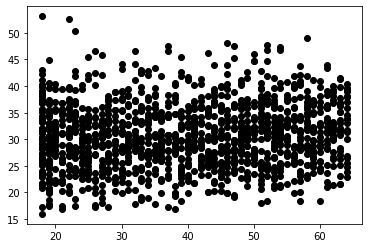

In [10]:
plt.scatter(insurance_dataset['age'],insurance_dataset['bmi'],color='black')
plt.show()

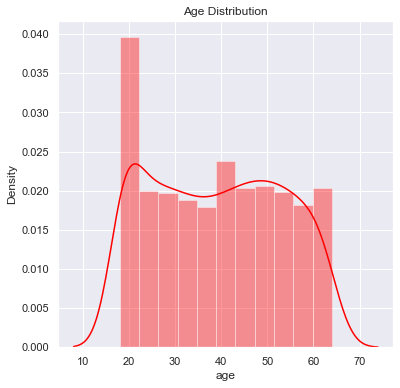

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'],color='red')
plt.title('Age Distribution')
plt.show()

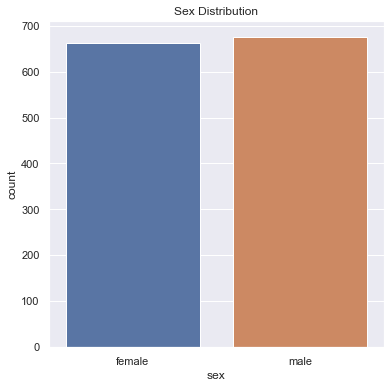

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

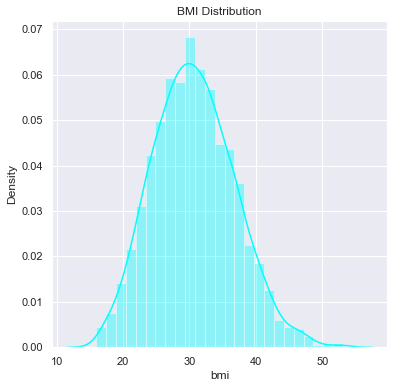

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'],color='cyan')
plt.title('BMI Distribution')
plt.show()

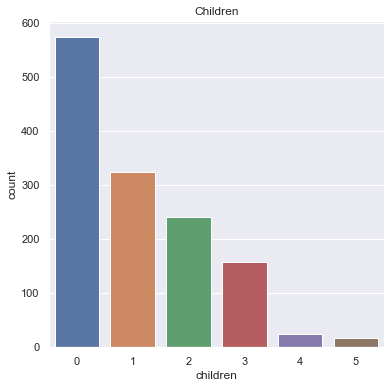

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

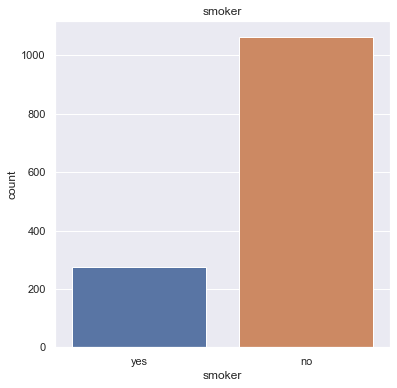

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

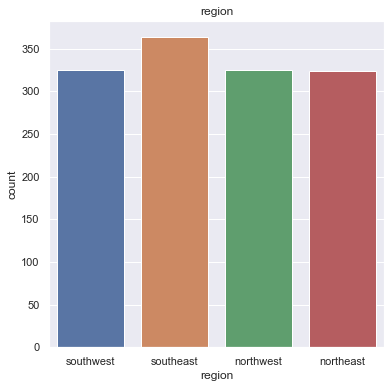

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

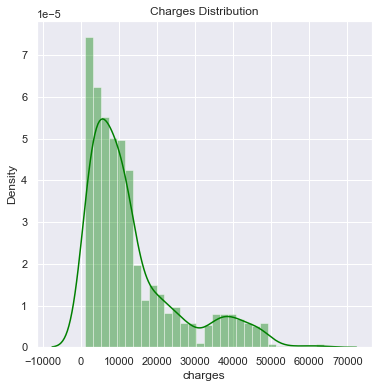

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'],color="green")
plt.title('Charges Distribution')
plt.show()

## Data Pre-Processing 

In [21]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [22]:
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [23]:
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [24]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [25]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [26]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting the data into Training data & Testing Data 

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [31]:
training_data_prediction =regressor.predict(X_train)

In [32]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared mean value : ', r2_train)

R squared mean value :  0.751505643411174


In [33]:
test_data_prediction =regressor.predict(X_test)

In [34]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared mean value : ', r2_test)

R squared mean value :  0.7447273869684077


## Predicting with test values

In [35]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD $',prediction[0])

[3760.0805765]
The insurance cost is USD $ 3760.0805764960487
